In [ ]:
# Import the visualization data library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import files and dataset library
import os
import openpyxl
import pandas as pd
import pprint

# Import the libraries required for dataset normalization
from sklearn.preprocessing import MinMaxScaler

# Import the machine learning library using scikit-learn
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE, RandomOverSampler

# Import the deep learning model library
from tensorflow.keras import layers, models
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
import tensorflow as tf

# Read and processing dataset

1. Reading dataset

In [ ]:
print(os.listdir("/content/drive/MyDrive/Viettel Dataset Customers/Dataset"))

['junction_postvip_sum_6mon_enr.txt', 'Danh_sach_truong_bai_1.xlsx']


In [ ]:
sheets = pd.read_excel("/content/drive/MyDrive/Viettel Dataset Customers/Dataset/Danh_sach_truong_bai_1.xlsx")
sheets

,Features,Details
0,ID,ID khách hàng
1,sum_total_use_charge_tn,Tổng tiền sử dụng tất cả các dịch vụ tháng n
2,sum_total_use_charge_tn_1,Tổng tiền sử dụng tất cả các dịch vụ tháng n - 1
3,sum_total_use_charge_tn_2,Tổng tiền sử dụng tất cả các dịch vụ tháng n - 2
4,sum_total_use_charge_tn_3,Tổng tiền sử dụng tất cả các dịch vụ tháng n...
...,...,...
148,sum_M_charge_tn_2,Tổng phí sử dụng M tháng n - 2
149,sum_M_charge_tn_3,Tổng phí sử dụng M tháng n - 3
150,sum_M_charge_tn_4,Tổng phí sử dụng M tháng n - 4
151,sum_M_charge_tn_5,Tổng phí sử dụng M tháng n - 5


2. Processing dataset

In [ ]:
transformed_sheets = sheets["Features"].values.tolist()
transformed_sheets

# Convert to nested list
nested_list = [[item] for item in transformed_sheets]
nested_list

[['ID'],
 ['sum_total_use_charge_tn'],
 ['sum_total_use_charge_tn_1'],
 ['sum_total_use_charge_tn_2'],
 ['sum_total_use_charge_tn_3'],
 ['sum_total_use_charge_tn_4'],
 ['sum_total_use_charge_tn_5'],
 ['sum_total_A s_tn'],
 ['sum_total_A s_tn_1'],
 ['sum_total_A s_tn_2'],
 ['sum_total_A s_tn_3'],
 ['sum_total_A s_tn_4'],
 ['sum_total_A s_tn_5'],
 ['sum_free_service_fee_tn'],
 ['sum_free_service_fee_tn_1'],
 ['sum_free_service_fee_tn_2'],
 ['sum_free_service_fee_tn_3'],
 ['sum_free_service_fee_tn_4'],
 ['sum_free_service_fee_tn_5'],
 ['sum_t_A_charge_tn'],
 ['sum_t_A_charge_tn_1'],
 ['sum_t_A_charge_tn_2'],
 ['sum_t_A_charge_tn_3'],
 ['sum_t_A_charge_tn_4'],
 ['sum_t_A_charge_tn_5'],
 ['sum_t_dịch vụ B_charge_tn'],
 ['sum_t_dịch vụ B_charge_tn_1'],
 ['sum_t_dịch vụ B_charge_tn_2'],
 ['sum_t_dịch vụ B_charge_tn_3'],
 ['sum_t_dịch vụ B_charge_tn_4'],
 ['sum_t_dịch vụ B_charge_tn_5'],
 ['sum_t_dịch vụ B_times_tn'],
 ['sum_t_dịch vụ B_times_tn_1'],
 ['sum_t_dịch vụ B_times_tn_2'],
 ['sum_t_d

In [ ]:
filename = open("/content/drive/MyDrive/Viettel Dataset Customers/Dataset/junction_postvip_sum_6mon_enr.txt")

In [ ]:
data = pd.read_csv(filename, sep='|', index_col=None, header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,150,151,152
0,2285899345,349688.56,400264.96,366640.87,464489.95,387936.79,364476.79,559.0,682.0,601.0,...,242.0,198.0,178.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2293856355,195987.11,224965.55,182741.57,206699.93,180660.21,183674.34,712.0,857.0,374.0,...,336.0,169.0,138.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2290588355,316340.62,322837.18,248428.44,240993.57,224259.06,207918.73,2021.0,1773.0,1205.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2216952365,181012.38,175681.86,233540.52,155115.52,152377.36,156420.10,290.0,246.0,252.0,...,25.0,33.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2221641375,334968.69,434120.10,253201.41,199496.40,126333.27,102412.77,1671.0,1717.0,1255.0,...,169.0,275.0,188.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919356,879581167,1062387.50,301511.08,284504.65,348671.82,334709.20,316715.98,891.0,879.0,871.0,...,430.0,488.0,545.0,0.0,0.0,0.0,0.0,0.0,0.0,0
919357,877683764,92831.82,92336.82,91239.09,91454.55,91454.55,92634.09,214.0,199.0,202.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
919358,875681966,111585.05,104847.32,128278.73,104098.67,111715.52,124081.43,473.0,322.0,408.0,...,48.0,46.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0
919359,879689265,176248.33,145510.77,203216.53,194512.55,167838.91,149995.47,458.0,456.0,727.0,...,110.0,133.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
nested_list = [item for sublist in nested_list for item in sublist]
nested_list

data.columns = nested_list
data

,ID,sum_total_use_charge_tn,sum_total_use_charge_tn_1,sum_total_use_charge_tn_2,sum_total_use_charge_tn_3,sum_total_use_charge_tn_4,sum_total_use_charge_tn_5,sum_total_A s_tn,sum_total_A s_tn_1,sum_total_A s_tn_2,...,sum_M_times_tn_3,sum_M_times_tn_4,sum_M_times_tn_5,sum_M_charge_tn,sum_M_charge_tn_1,sum_M_charge_tn_2,sum_M_charge_tn_3,sum_M_charge_tn_4,sum_M_charge_tn_5,churn
0,2285899345,349688.56,400264.96,366640.87,464489.95,387936.79,364476.79,559.0,682.0,601.0,...,242.0,198.0,178.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2293856355,195987.11,224965.55,182741.57,206699.93,180660.21,183674.34,712.0,857.0,374.0,...,336.0,169.0,138.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2290588355,316340.62,322837.18,248428.44,240993.57,224259.06,207918.73,2021.0,1773.0,1205.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2216952365,181012.38,175681.86,233540.52,155115.52,152377.36,156420.10,290.0,246.0,252.0,...,25.0,33.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2221641375,334968.69,434120.10,253201.41,199496.40,126333.27,102412.77,1671.0,1717.0,1255.0,...,169.0,275.0,188.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919356,879581167,1062387.50,301511.08,284504.65,348671.82,334709.20,316715.98,891.0,879.0,871.0,...,430.0,488.0,545.0,0.0,0.0,0.0,0.0,0.0,0.0,0
919357,877683764,92831.82,92336.82,91239.09,91454.55,91454.55,92634.09,214.0,199.0,202.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
919358,875681966,111585.05,104847.32,128278.73,104098.67,111715.52,124081.43,473.0,322.0,408.0,...,48.0,46.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0
919359,879689265,176248.33,145510.77,203216.53,194512.55,167838.91,149995.47,458.0,456.0,727.0,...,110.0,133.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919361 entries, 0 to 919360
Columns: 153 entries, ID to churn
dtypes: float64(150), int64(3)
memory usage: 1.0 GB


In [ ]:
data.isna().sum()

,0
ID,0
sum_total_use_charge_tn,0
sum_total_use_charge_tn_1,0
sum_total_use_charge_tn_2,0
sum_total_use_charge_tn_3,0
...,...
sum_M_charge_tn_2,0
sum_M_charge_tn_3,0
sum_M_charge_tn_4,0
sum_M_charge_tn_5,0


In [ ]:
data.columns

Index(['ID', 'sum_total_use_charge_tn', 'sum_total_use_charge_tn_1',
       'sum_total_use_charge_tn_2', 'sum_total_use_charge_tn_3',
       'sum_total_use_charge_tn_4', 'sum_total_use_charge_tn_5',
       'sum_total_A s_tn', 'sum_total_A s_tn_1', 'sum_total_A s_tn_2',
       ...
       'sum_M_times_tn_3', 'sum_M_times_tn_4', 'sum_M_times_tn_5',
       'sum_M_charge_tn', 'sum_M_charge_tn_1', 'sum_M_charge_tn_2',
       'sum_M_charge_tn_3', 'sum_M_charge_tn_4', 'sum_M_charge_tn_5', 'churn'],
      dtype='object', length=153)

# EDA - Exploratory Data Analysis

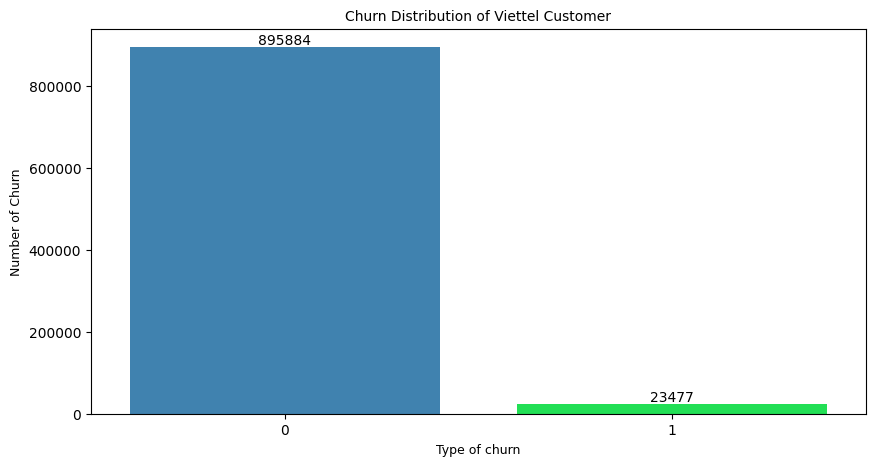

In [ ]:
def visualization_features(feature, title, x_label, y_label):
  """
  Visualizes the distribution of a feature using a countplot.

  Args:
    feature: The name of the column in the DataFrame to visualize.
    title: The title of the plot.
    x_label: The label for the x-axis.
    y_label: The label for the y-axis.
  """
  plt.figure(figsize = (10, 5))

  # Check if the feature is a valid column name
  if feature not in data.columns:
    raise ValueError(f"Column '{feature}' not found in the DataFrame.")

  # Create list color for bar chart
  color = ['#2e86c1', '#02ff47']

  # Create the countplot
  data_sns = sns.countplot(x=feature, data=data, palette=color) # Changed this line to use x= and data=

  # Set x-axis labels
  data_sns.set_xticklabels(data_sns.get_xticklabels())

  # Add count labels to the bars
  for counts in data_sns.patches:
    bar_height = counts.get_height()
    label_x = counts.get_x() + counts.get_width() / 2
    label_y = counts.get_y() / bar_height + bar_height
    plt.text(label_x, label_y, s = f"{bar_height:.0f}", ha='center', va='bottom', color = "black", size = 10)

  plt.title(title, fontsize = 10)
  plt.xlabel(x_label, fontsize = 9)
  plt.ylabel(y_label, fontsize = 9)
  plt.show()

# Example usage, assuming 'churn' is a valid column name:
visualization_features('churn', "Churn Distribution of Viettel Customer", "Type of churn", "Number of Churn")

In [ ]:
# 0: Using - 1: Churn
churn_count = data['churn'].value_counts().reset_index().rename(columns={'index':'churn','churn':'count'})
churn_count.iloc[0,0] = 'No churn'
churn_count.iloc[1,0] = 'Churn'

# Percentage
churn_count['percentage'] = [round(churn_count.iloc[0,1]/len(data)*100, 2),round(churn_count.iloc[1,1]/len(data)*100, 2)]
churn_count['percentage'] = churn_count['percentage'].astype(str) + '%'
churn_count

,count,count,percentage
0,No churn,895884,97.45%
1,Churn,23477,2.55%


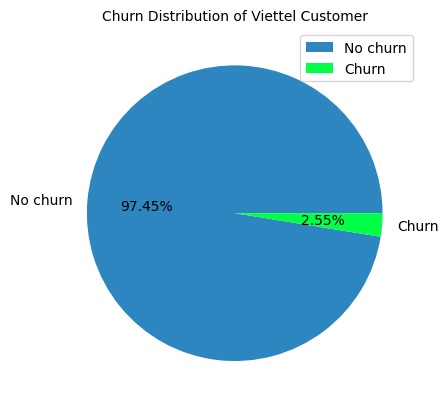

In [ ]:
# Percentage pie chart
colors = ['#2e86c1', '#02ff47']
labels = ['No churn', 'Churn']
percentages = round(churn_count.iloc[0,1] / len(data) * 100, 2), round(churn_count.iloc[1,1] / len(data) * 100, 2)

# Use the numerical percentages directly for the pie chart
plt.pie(percentages, labels=labels, colors=colors, autopct='%0.2f%%')
plt.legend()
plt.title("Churn Distribution of Viettel Customer", fontsize = 10)
plt.show()

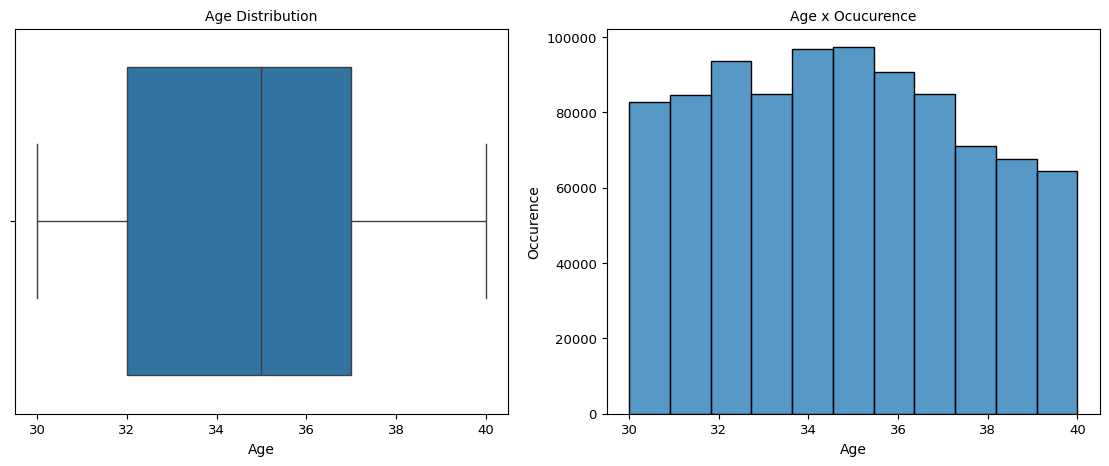

In [ ]:
# Age
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 5))

sns.boxplot(x = data["customer_age"], ax = ax1, showfliers = False)
ax1.set_xlabel("Age", fontsize = 10)
ax1.set_title("Age Distribution", fontsize = 10)
ax1.tick_params(labelsize = 9.5)

sns.histplot(x = data["customer_age"], ax = ax2, bins = 11)
ax2.set_xlabel('Age', fontsize = 10)
ax2.set_ylabel('Occurence', fontsize = 10)
ax2.set_title('Age x Ocucurence', fontsize = 10)
ax2.tick_params(labelsize = 9.5)
plt.show()

In [ ]:
def compute_mean_charge(data, name_column):
    # Create an empty dictionary to store the results.
    mean_charge = {}
    # Iterate through each column name in name_column
    for column_name in name_column:
        # Calculate the median for the current column
        median_value = round(data[column_name].mean(), 2)
        # Store the median value in the mean_charge dictionary
        mean_charge[column_name] = median_value
    # Convert the mean_charge dictionary into a pandas Series
    # This makes it easier to work with, especially if you want to perform further analysis or data manipulation.
    mean_charge_series = pd.Series(mean_charge, name="Average total charge")
    return mean_charge_series # Return the series containing median charge

In [ ]:
list_services = ["sum_total_use_charge_tn",	"sum_total_use_charge_tn_1",	"sum_total_use_charge_tn_2",	"sum_total_use_charge_tn_3",	"sum_total_use_charge_tn_4",	"sum_total_use_charge_tn_5"]
mean_charge = compute_mean_charge(data, list_services)
mean_charge

,Average total charge
sum_total_use_charge_tn,208455.04
sum_total_use_charge_tn_1,211684.78
sum_total_use_charge_tn_2,210678.65
sum_total_use_charge_tn_3,216952.45
sum_total_use_charge_tn_4,212277.44
sum_total_use_charge_tn_5,215177.01


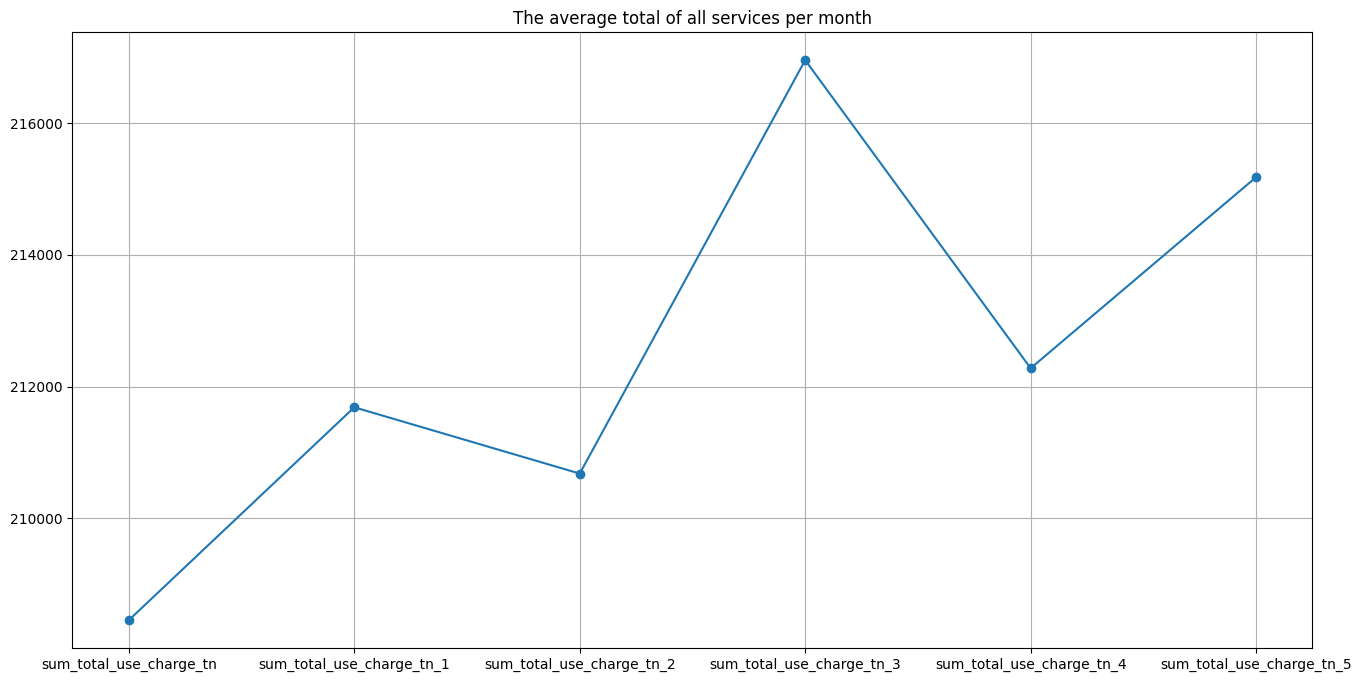

In [ ]:
x = np.array(mean_charge.values)
plt.figure(figsize = (16, 8))
plt.plot(list_services, x, marker = "o")
plt.title("The average total of all services per month", fontsize = 12)
plt.grid()
plt.show()

In [ ]:
cus_out = data.loc[data['churn'] == 1]
cus_use = data.loc[data['churn'] == 0]

In [ ]:
def slice_month(cus_out, cus_use, name_column):
  list_out = cus_out[name_column].mean()
  list_use = cus_use[name_column].mean()
  df_data =  pd.DataFrame({"x": [1,2,3,4,5,6], "use" : list_use.values ,"out" : list_out.values})
  return df_data

In [ ]:
#Tổng tiền sử dụng dịch vụ A "sum_t_A_charge_tn"
name_column_ChaA = ['sum_t_A_charge_tn_5','sum_t_A_charge_tn_4','sum_t_A_charge_tn_3','sum_t_A_charge_tn_2','sum_t_A_charge_tn_1','sum_t_A_charge_tn']
df_ChaA = slice_month(cus_out, cus_use, name_column_ChaA)

df_ChaA

,x,use,out
0,1,62954.877241,45454.901483
1,2,61041.635293,44470.592835
2,3,64778.372034,47811.968999
3,4,59853.903398,44814.806384
4,5,60248.639730,39445.968017
5,6,59975.641871,22581.859350


<Axes: xlabel='x'>

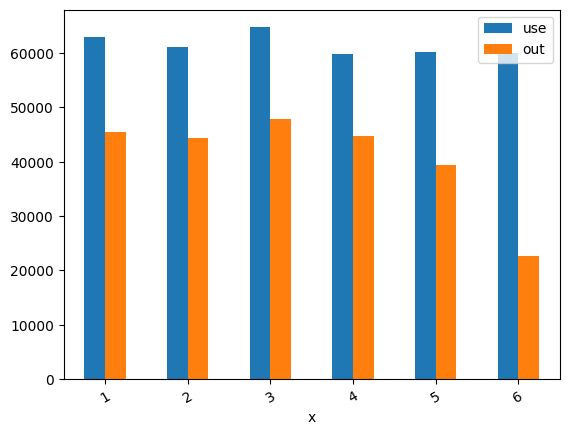

In [ ]:
df_ChaA.plot.bar(x='x', y=['use','out'], rot=30)

In [ ]:
x = data.drop(['churn'], axis=1)
y = data[['churn']]

x.shape, y.shape

((919361, 152), (919361, 1))

In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(np.array(y).reshape(-1, 1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((735488, 152), (183873, 152), (735488, 1), (183873, 1))

In [ ]:
# Applying SMOTE on the training data
sm = SMOTE(random_state = 42)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)
x_test_smote, y_test_smote = sm.fit_resample(x_test, y_test)
x_train_smote.shape, y_train_smote.shape, x_test_smote.shape, y_test_smote.shape

((1433256, 152), (1433256,), (358512, 152), (358512,))

In [ ]:
# Applying Random Over Sampler on the training data
over_sampling = RandomOverSampler()
x_train_sampled, y_train_sampled = over_sampling.fit_resample(x_train, y_train)
x_test_sampled, y_test_sampled = over_sampling.fit_resample(x_test, y_test)
x_train_sampled.shape, y_train_sampled.shape, x_test_sampled.shape, y_test_sampled.shape

((1433256, 152), (1433256,), (358512, 152), (358512,))

In [ ]:
# Define a function which evaluates the model with train and test score
def model_eval(model, x_train, y_train, x_test, y_test, colors):
  from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score, recall_score, precision_score

  # The line below was causing the error. y_train is likely already a NumPy array, so .values is not needed.
  # Instead, we directly use ravel() on y_train
  model.fit(x_train, y_train.ravel()) # Changed this line to remove .values

  # Print accuracy, AUC and Recall Score in the train data
  y_prediction_train = model.predict(x_train)
  y_score_train = model.predict_proba(x_train)[:,1]
  print("Overall Train Accuracy:", accuracy_score(y_train, y_prediction_train))
  print("Train AUC Score:", roc_auc_score(y_train, y_score_train))
  print("Overall Train Recall:", recall_score(y_train, y_prediction_train))

  print("-" * 60)

  y_prediction = model.predict(x_test)
  y_score = model.predict_proba(x_test)[:,1]

  # Print accuracy, AUC and Recall Score
  print("Overall Test Accuracy:", accuracy_score(y_test, y_prediction))
  print("Test AUC Score:", roc_auc_score(y_test, y_score))
  print("Overall Test Recall:", recall_score(y_test, y_prediction))

  # Classification report for the dataset
  print("-" * 60)
  print('Classification Report of Test:\n', classification_report(y_test, y_prediction))

  kf = KFold(n_splits = 5,shuffle = True,random_state = 42)
  score=[]
  for train_idx,test_idx in kf.split(x_train,y_train):
      xtrain_k,xtest_k = x_train[train_idx],x_train[test_idx]
      ytrain_k,ytest_k = y_train[train_idx],y_train[test_idx]
      model.fit(xtrain_k,ytrain_k)
      y_pred_k = model.predict(xtest_k)
      roc = roc_auc_score(ytest_k,y_pred_k)
      score.append(roc)

  print('K-Fold scores: %0.03f (+/- %0.5f)' % (np.mean(score),np.var(score,ddof=1)))

  cm = confusion_matrix(y_test, y_prediction)
  df_cm = pd.DataFrame(cm, range(2),
                    range(2))

  plt.figure(figsize = (12, 6))
  plt.subplot(1, 2, 1)
  cm_plot = sns.heatmap(df_cm, annot=True, fmt='n', annot_kws={"size": 9.35},
                        xticklabels = ["Use", "Out"],
                        yticklabels = ["Use", "Out"], cmap = "Blues")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix", fontsize = 10)

  false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
  plt.subplot(1, 2, 2)
  plt.plot([0, 1], [0, 1], color="navy", lw = 1.5, linestyle = "--")

  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.plot(false_positive_rate, true_positive_rate, linewidth = 2.5,
          label="ROC curve (area = %0.2f)" % roc_auc_score(y_test, y_score), color = colors)
  plt.title("ROC Curve", fontsize = 10)
  plt.xlabel("False Positive Rate - FPR")
  plt.ylabel("True Positive Rate - TPR")
  plt.grid()
  plt.legend()
  plt.show()

In [ ]:
x_train_dataset = [x_train, x_train_smote, x_train_sampled]
y_train_dataset = [y_train, y_train_smote, y_train_sampled]
x_test_dataset = [x_test, x_test_smote, x_test_sampled]
y_test_dataset = [y_test, y_test_smote, y_test_sampled]
name = ['Normal Sampling' , 'SMOTE', 'Over Sampling']

Data is Normal Sampling
Overall Train Accuracy: 0.8969364557953359
Train AUC Score: 0.7101816055490728
Overall Train Recall: 0.39835630965005303
------------------------------------------------------------
Overall Test Accuracy: 0.8969995594785531
Test AUC Score: 0.7137608267760396
Overall Test Recall: 0.39354559237600173
------------------------------------------------------------
Classification Report of Test:
               precision    recall  f1-score   support

         0.0       0.98      0.91      0.95    179256
         1.0       0.10      0.39      0.16      4617

    accuracy                           0.90    183873
   macro avg       0.54      0.65      0.55    183873
weighted avg       0.96      0.90      0.93    183873

K-Fold scores: 0.654 (+/- 0.00001)


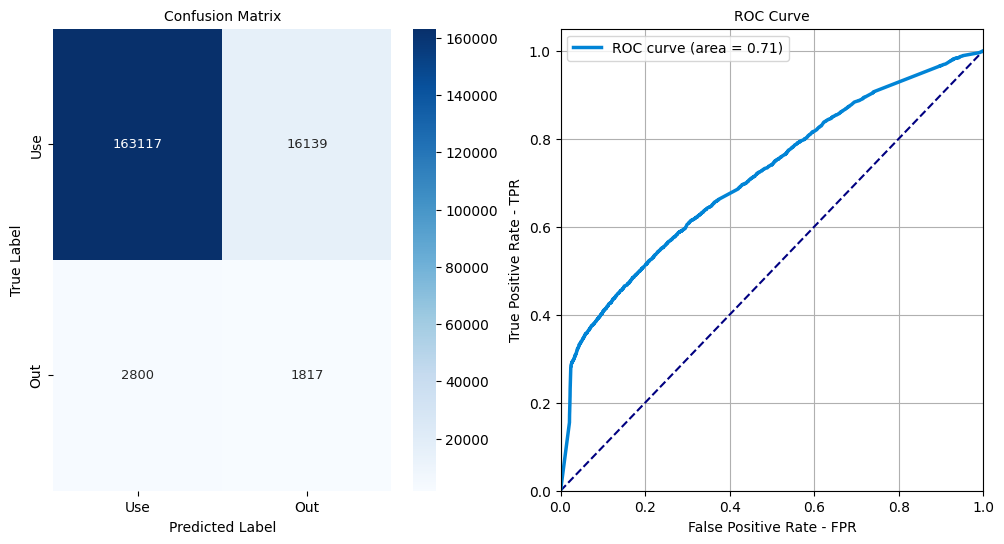

____________________________________________________________
Data is SMOTE
Overall Train Accuracy: 0.624518578676803
Train AUC Score: 0.6933553580484164
Overall Train Recall: 0.32300300853441394
------------------------------------------------------------
Overall Test Accuracy: 0.6189081537019682
Test AUC Score: 0.6983682598999534
Overall Test Recall: 0.3131610657383853
------------------------------------------------------------
Classification Report of Test:
               precision    recall  f1-score   support

         0.0       0.57      0.92      0.71    179256
         1.0       0.81      0.31      0.45    179256

    accuracy                           0.62    358512
   macro avg       0.69      0.62      0.58    358512
weighted avg       0.69      0.62      0.58    358512

K-Fold scores: 0.625 (+/- 0.00000)


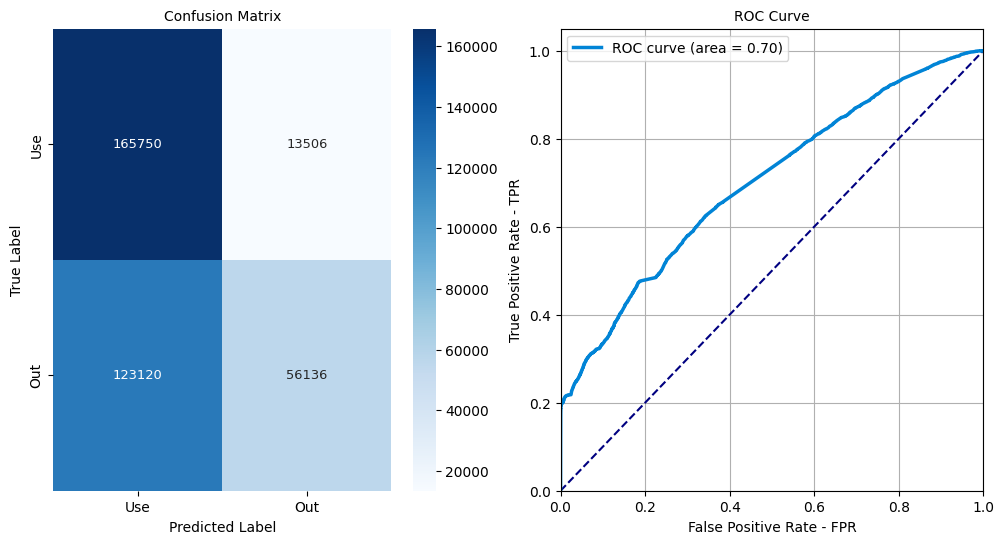

____________________________________________________________
Data is Over Sampling
Overall Train Accuracy: 0.6586960040634751
Train AUC Score: 0.7108234254439743
Overall Train Recall: 0.4485772255619373
------------------------------------------------------------
Overall Test Accuracy: 0.6546112821886018
Test AUC Score: 0.7129759971822132
Overall Test Recall: 0.44045945463471237
------------------------------------------------------------
Classification Report of Test:
               precision    recall  f1-score   support

         0.0       0.61      0.87      0.72    179256
         1.0       0.77      0.44      0.56    179256

    accuracy                           0.65    358512
   macro avg       0.69      0.65      0.64    358512
weighted avg       0.69      0.65      0.64    358512

K-Fold scores: 0.659 (+/- 0.00000)


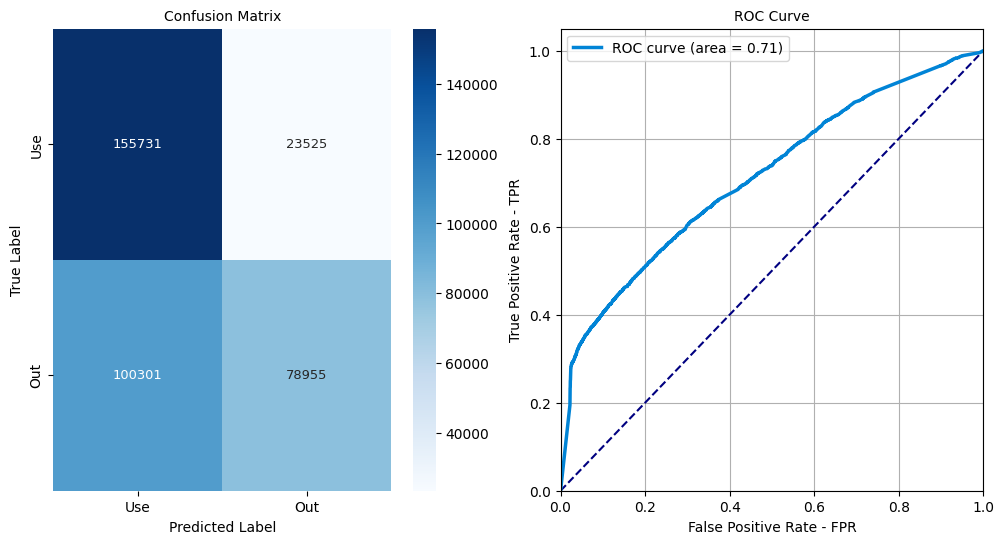

____________________________________________________________


In [ ]:
colors_NB = "#0184D6"
for Xtrain, Ytrain, Xtest, Ytest, sampleName in zip(x_train_dataset, y_train_dataset, x_test_dataset, y_test_dataset, name):
  print("Data is", sampleName)
  model_eval(BernoulliNB(), Xtrain, Ytrain, Xtest, Ytest, colors_NB)
  print("_" * 60)

Data is Normal Sampling
Overall Train Accuracy: 0.9748806234772015
Train AUC Score: 0.782266647899618
Overall Train Recall: 0.06574761399787911
------------------------------------------------------------
Overall Test Accuracy: 0.9754776394576692
Test AUC Score: 0.7904550949304874
Overall Test Recall: 0.06800952999783409
------------------------------------------------------------
Classification Report of Test:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    179256
         1.0       0.60      0.07      0.12      4617

    accuracy                           0.98    183873
   macro avg       0.79      0.53      0.55    183873
weighted avg       0.97      0.98      0.97    183873

K-Fold scores: 0.529 (+/- 0.00000)


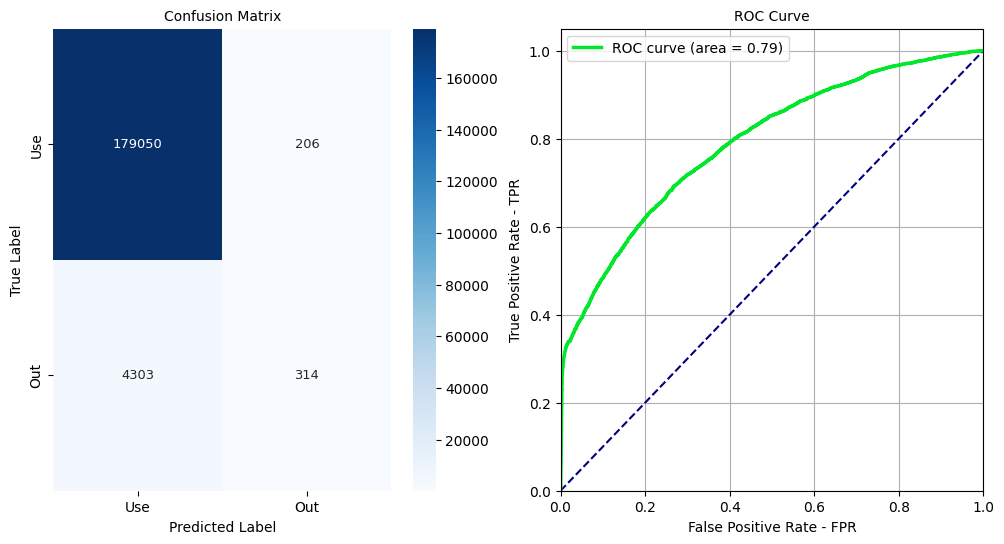

____________________________________________________________
Data is SMOTE
Overall Train Accuracy: 0.7710590431855858
Train AUC Score: 0.8522647710392037
Overall Train Recall: 0.7726979688206433
------------------------------------------------------------
Overall Test Accuracy: 0.7756393091444638
Test AUC Score: 0.8578459422705631
Overall Test Recall: 0.7829082429597893
------------------------------------------------------------
Classification Report of Test:
               precision    recall  f1-score   support

         0.0       0.78      0.77      0.77    179256
         1.0       0.77      0.78      0.78    179256

    accuracy                           0.78    358512
   macro avg       0.78      0.78      0.78    358512
weighted avg       0.78      0.78      0.78    358512

K-Fold scores: 0.762 (+/- 0.00003)


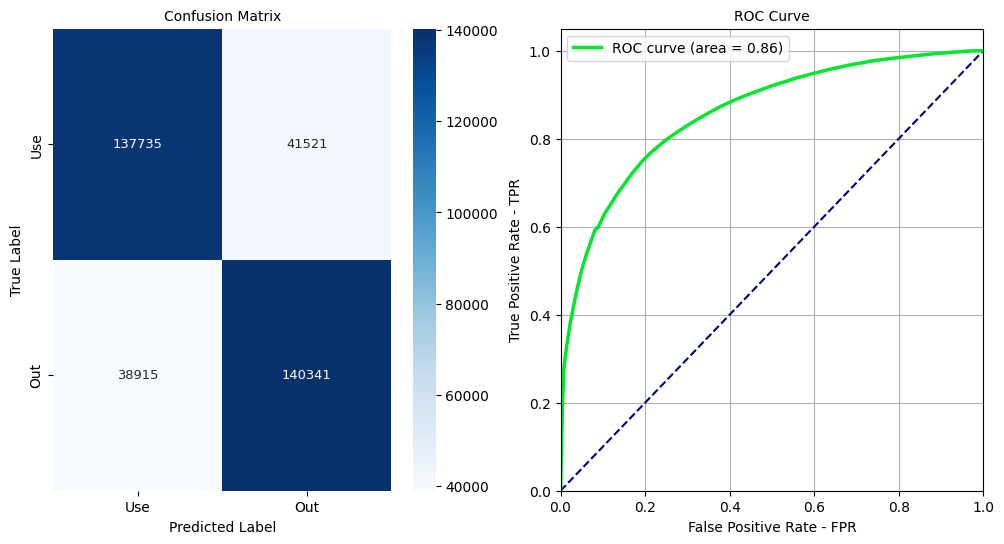

____________________________________________________________
Data is Over Sampling
Overall Train Accuracy: 0.7697668804456427
Train AUC Score: 0.8440390089006491
Overall Train Recall: 0.7447866954682206
------------------------------------------------------------
Overall Test Accuracy: 0.7732209800508769
Test AUC Score: 0.8466711492485636
Overall Test Recall: 0.752287231668675
------------------------------------------------------------
Classification Report of Test:
               precision    recall  f1-score   support

         0.0       0.76      0.79      0.78    179256
         1.0       0.79      0.75      0.77    179256

    accuracy                           0.77    358512
   macro avg       0.77      0.77      0.77    358512
weighted avg       0.77      0.77      0.77    358512

K-Fold scores: 0.761 (+/- 0.00001)


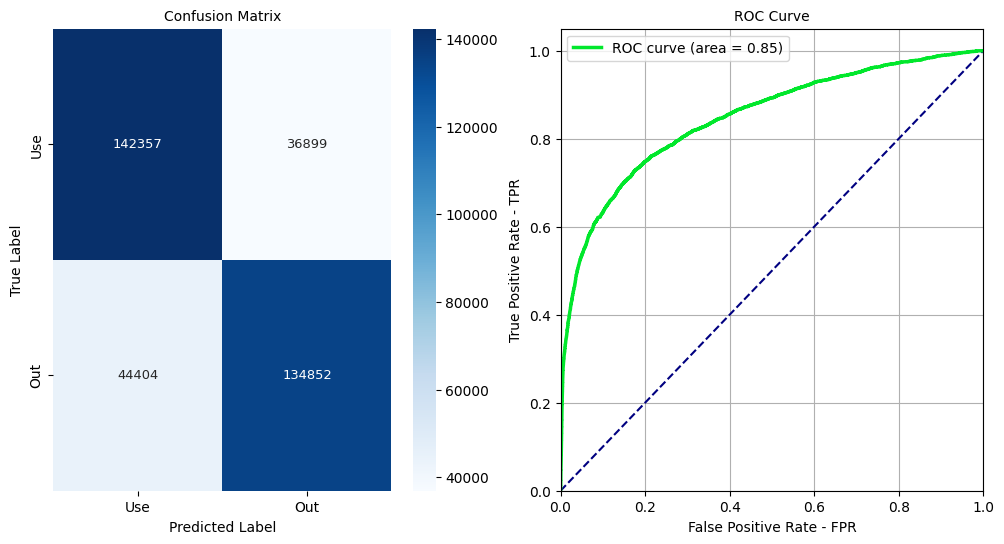

____________________________________________________________


In [ ]:
# Result of each Sampling Method
from sklearn.linear_model import LogisticRegression
colors_LR = "#01E72C"
for Xtrain, Ytrain, Xtest, Ytest, sampleName in zip(x_train_dataset, y_train_dataset, x_test_dataset, y_test_dataset, name):
  print("Data is", sampleName)
  model_eval(LogisticRegression(), Xtrain, Ytrain, Xtest, Ytest, colors_LR)
  print("_" * 60)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(150, activation='relu'))
model.add(layers.Dense(50, activation='sigmoid'))
model.add(layers.Dense(3, activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
check_point = ModelCheckpoint('/content/drive/MyDrive/Viettel Dataset Customers/Model/model_RNN.keras', monitor="val_accuracy", mode="max",
                              verbose=True, save_best_only=True)

opt = Adam(learning_rate= 0.0001)

model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs= 200, validation_split = 0.3, batch_size=32,
                    verbose = True, validation_data=(x_test, y_test), callbacks = [check_point])

Epoch 1/200
22981/22984 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9278 - loss: 0.2040
Epoch 1: val_accuracy improved from -inf to 0.97673, saving model to /content/drive/MyDrive/Viettel Dataset Customers/Model/model_RNN.keras
22984/22984 ━━━━━━━━━━━━━━━━━━━━ 58s 2ms/step - accuracy: 0.9278 - loss: 0.2040 - val_accuracy: 0.9767 - val_loss: 0.0906
Epoch 2/200
22965/22984 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9771 - loss: 0.0912
Epoch 2: val_accuracy improved from 0.97673 to 0.97872, saving model to /content/drive/MyDrive/Viettel Dataset Customers/Model/model_RNN.keras
22984/22984 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - accuracy: 0.9771 - loss: 0.0912 - val_accuracy: 0.9787 - val_loss: 0.0854
Epoch 3/200
22971/22984 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9786 - loss: 0.0866
Epoch 3: val_accuracy improved from 0.97872 to 0.97920, saving model to /content/drive/MyDrive/Viettel Dataset Customers/Model/model_RNN.keras
22984/22984 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - accuracy:

In [ ]:
model_ANN = models.Sequential()
model_ANN.add(layers.Dense(150,  kernel_initializer = 'uniform', activation='relu'))
model_ANN.add(layers.Dense(50,  kernel_initializer = 'uniform', activation='sigmoid'))
model_ANN.add(layers.Dense(3,  kernel_initializer = 'uniform', activation='sigmoid'))

model_ANN.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
check_point_ANN = ModelCheckpoint('/content/drive/MyDrive/Viettel Dataset Customers/model_ANN.keras', monitor="val_accuracy", mode="max",
                              verbose=True, save_best_only=True)

opt = Adam(learning_rate= 0.0001)

model_ANN.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history_ANN = model_ANN.fit(x_train, y_train, epochs= 200, validation_split = 0.3, batch_size=32,
                    verbose = True, validation_data=(x_test, y_test), callbacks = [check_point_ANN])

Epoch 1/200
22974/22984 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9691 - loss: 0.1682
Epoch 1: val_accuracy improved from -inf to 0.97490, saving model to /content/drive/MyDrive/Viettel Dataset Customers/model_ANN.keras
22984/22984 ━━━━━━━━━━━━━━━━━━━━ 58s 2ms/step - accuracy: 0.9691 - loss: 0.1682 - val_accuracy: 0.9749 - val_loss: 0.0919
Epoch 2/200
22978/22984 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9751 - loss: 0.0928
Epoch 2: val_accuracy improved from 0.97490 to 0.97703, saving model to /content/drive/MyDrive/Viettel Dataset Customers/model_ANN.keras
22984/22984 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - accuracy: 0.9751 - loss: 0.0928 - val_accuracy: 0.9770 - val_loss: 0.0873
Epoch 3/200
22971/22984 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9769 - loss: 0.0896
Epoch 3: val_accuracy improved from 0.97703 to 0.97807, saving model to /content/drive/MyDrive/Viettel Dataset Customers/model_ANN.keras
22984/22984 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - accuracy: 0.9769 - loss: 0.

In [ ]:
# Loss and Accuracy of Deep Learning Model
def plot_model(history):
  loss = history.history['loss']
  validation_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  fig = plt.gcf()
  fig.set_size_inches(16, 8)
  plt.subplot(1,2,1)
  plt.plot(loss)
  plt.plot(validation_loss, color = "#01CE1B")
  plt.xlabel("Epochs")
  plt.legend(['Loss', 'Validation Loss'])
  plt.grid()
  plt.subplot(1,2,2)
  plt.plot(accuracy)
  plt.plot(val_accuracy, color = "#01CE1B")
  plt.xlabel("Epochs")
  plt.legend(['Accuracy', 'Validation Accuracy'])
  plt.grid()
  plt.show()

In [ ]:
plot_model(history)

In [ ]:
check_point_LSTM = ModelCheckpoint('/content/drive/MyDrive/Viettel Dataset Customers/model_LSTM.keras', monitor="val_accuracy", mode="max",
                              verbose=True, save_best_only=True)


model_LSTM.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history_LSTM = model_LSTM.fit(x_train, y_train, epochs= 200, validation_split = 0.3, batch_size=32,
                    verbose = True, validation_data=(x_test, y_test), callbacks = [check_point_LSTM])

Epoch 1/200
 2099/22984 ━━━━━━━━━━━━━━━━━━━━ 2:57 9ms/step - accuracy: 0.9747 - loss: 0.1189

KeyboardInterrupt: 

In [ ]:
from keras.models import load_model
saved_model = load_model("/content/model_RNN.keras")
saved_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (32, 150)                   │          22,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 50)                    │           7,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 3)                     │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,961 (359.23 KB)

 Trainable params: 30,653 (119.74 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,308 (239.49 KB)

In [ ]:
_, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.981, Test: 0.981


In [ ]:
def model_eval_deep(model, x_train, y_train, x_test, y_test, colors):
  from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score, recall_score, precision_score

  # Fit the model
  model.fit(x_train, y_train.ravel())

  # Print accuracy, AUC and Recall Score in the train data
  y_prediction_train = model.predict(x_train)
  # Get predicted probabilities using 'predict' instead of 'predict_proba'
  y_score_train = model.predict(x_train)[:,1]
  print("Overall Train Accuracy:", accuracy_score(y_train, y_prediction_train))
  print("Train AUC Score:", roc_auc_score(y_train, y_score_train))
  print("Overall Train Recall:", recall_score(y_train, y_prediction_train))

  print("-" * 60)

  y_prediction = model.predict(x_test)
  # Get predicted probabilities using 'predict' instead of 'predict_proba'
  y_score = model.predict(x_test)[:,1]

  # Print accuracy, AUC and Recall Score
  print("Overall Test Accuracy:", accuracy_score(y_test, y_prediction))
  print("Test AUC Score:", roc_auc_score(y_test, y_score))
  print("Overall Test Recall:", recall_score(y_test, y_prediction))

# Classification report for the dataset
  print("-" * 60)
  print('Classification Report of Test:\n', classification_report(y_test, y_prediction))

  kf = KFold(n_splits = 5,shuffle = True,random_state = 42)
  score=[]
  for train_idx,test_idx in kf.split(x_train,y_train):
      xtrain_k,xtest_k = x_train[train_idx],x_train[test_idx]
      ytrain_k,ytest_k = y_train[train_idx],y_train[test_idx]
      model.fit(xtrain_k,ytrain_k)
      y_pred_k = model.predict(xtest_k)
      roc = roc_auc_score(ytest_k,y_pred_k)
      score.append(roc)

  print('K-Fold scores: %0.03f (+/- %0.5f)' % (np.mean(score),np.var(score,ddof=1)))

  cm = confusion_matrix(y_test, y_prediction)
  df_cm = pd.DataFrame(cm, range(2),
                    range(2))

  plt.figure(figsize = (12, 6))
  plt.subplot(1, 2, 1)
  cm_plot = sns.heatmap(df_cm, annot=True, fmt='n', annot_kws={"size": 9.35},
                        xticklabels = ["Use", "Out"],
                        yticklabels = ["Use", "Out"], cmap = "Blues")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix", fontsize = 10)

  false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
  plt.subplot(1, 2, 2)
  plt.plot([0, 1], [0, 1], color="navy", lw = 1.5, linestyle = "--")

  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.plot(false_positive_rate, true_positive_rate, linewidth = 2.5,
          label="ROC curve (area = %0.2f)" % roc_auc_score(y_test, y_score), color = colors)
  plt.title("ROC Curve", fontsize = 10)
  plt.xlabel("False Positive Rate - FPR")
  plt.ylabel("True Positive Rate - TPR")
  plt.grid()
  plt.legend()
  plt.show()

In [ ]:
colors = "orange"
for Xtrain, Ytrain, Xtest, Ytest, sampleName in zip(x_train_dataset, y_train_dataset, x_test_dataset, y_test_dataset, name):
  print("Data is", sampleName)
  model_eval_deep(saved_model, Xtrain, Ytrain, Xtest, Ytest, colors)
  print("_" * 60)

Data is Normal Sampling
22984/22984 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9809 - loss: 0.0751
22984/22984 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step
22984/22984 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets